In [1]:
import os
import sys
%pip install -q ipywidgets
import ipywidgets as widgets

directorio = '../Results'
# para colab
# directorio = '/content' # si es un directorio en el que se subieron los archivos a colab o en drive agregar ruta

# Leer archivos xlsx dentro de la carpeta Results de manera recursiva

files = []
for r, d, f in os.walk(directorio):
  for file in f:
    if '.xlsx' in file:
      files.append(os.path.join(r, file))


# Seleccionar archivo a leer
dropdown = widgets.Dropdown(
  options=[('Seleccionar archivo', None)] + [(f, f) for f in files],
  description='Archivo:',
  disabled=False,
)
nombre_archivo = '';
def on_change(change):
  if change['type'] == 'change' and change['name'] == 'value':
    if change['new'] is not None:
      global nombre_archivo
      nombre_archivo = change['new']
      print('Archivo seleccionado:', nombre_archivo)

dropdown.observe(on_change)
display(dropdown)


Note: you may need to restart the kernel to use updated packages.


Dropdown(description='Archivo:', options=(('Seleccionar archivo', None), ('../Results/02_clusters_dataset_prev…

In [3]:

nombre_directorio_destino = '  '

def nombre_valido(nombre):
  # si contiene espacios retorna False
  if ' ' in nombre:
    return False
  nombre_normalizado = nombre.replace('-', '').replace('_', '')
  sigue_alfanumerico = nombre_normalizado.isalnum()
  print(f"nombre: {nombre}, nombre_normalizado: {nombre_normalizado}, sigue_alfanumerico: {sigue_alfanumerico}")
  return sigue_alfanumerico

while not nombre_valido(nombre_directorio_destino):
  nombre_directorio_destino = input("Ingrese el nombre del directorio de salida (sin espacios): ")

# Crear directorio destino dentro de directorio
directorio_salida = os.path.join(directorio, nombre_directorio_destino)
if not os.path.exists(directorio_salida):
  os.makedirs(directorio_salida)
  print(f"Directorio {directorio_salida} creado")


nombre: 04-clusters-con-categoricos, nombre_normalizado: 04clustersconcategoricos, sigue_alfanumerico: True
Directorio ../Results\04-clusters-con-categoricos creado


In [4]:
import pandas as pd

# Leer archivo seleccionado
path = os.path.join(directorio, nombre_archivo)

df = pd.read_excel(path)

# get numerical features in the DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# quitar columnas que no son features
numerical_features = numerical_features.drop(['cluster_kmeans', 'cluster_hc'])

,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,1p_total_actividades_calificadas_tiempo,1p_porcentaje_aprobados,2p_total_actividades_asignadas,...,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,correos_enviados,correos_recibidos,cluster_kmeans,cluster_hc
0,25,18,18,1.0,438,438.0,0.998,437.0,0,19.0,...,452.0,1.0,452.0,0,890.0,0.0,5.75,2.25,3,2
1,23,19,19,1.0,402,402.0,1.000,402.0,0,20.0,...,380.0,1.0,380.0,0,782.0,0.0,43.00,17.00,3,2
2,43,5,5,1.0,131,131.0,1.000,131.0,0,0.0,...,0.0,0.0,0.0,0,131.0,0.0,7.50,2.50,1,1
3,16,6,6,1.0,89,89.0,1.000,89.0,0,10.0,...,139.0,1.0,139.0,81,228.0,0.0,21.00,18.00,2,3
4,20,6,6,1.0,102,102.0,1.000,102.0,0,10.0,...,137.0,1.0,137.0,50,239.0,0.0,20.75,13.25,2,3


array([[25.  , 18.  , 18.  , ...,  0.  ,  5.75,  2.25],
       [23.  , 19.  , 19.  , ...,  0.  , 43.  , 17.  ],
       [43.  ,  5.  ,  5.  , ...,  0.  ,  7.5 ,  2.5 ],
       ...,
       [47.  , 14.  , 12.  , ...,  0.  , 16.  ,  2.  ],
       [31.  , 14.  , 11.  , ...,  1.  , 18.5 ,  1.  ],
       [47.  , 10.  ,  7.  , ..., 43.  ,  5.25,  1.  ]])

array([[25.  , 18.  , 18.  , ...,  0.  ,  5.75,  2.25],
       [23.  , 19.  , 19.  , ...,  0.  , 43.  , 17.  ],
       [43.  ,  5.  ,  5.  , ...,  0.  ,  7.5 ,  2.5 ],
       ...,
       [47.  , 14.  , 12.  , ...,  0.  , 16.  ,  2.  ],
       [31.  , 14.  , 11.  , ...,  1.  , 18.5 ,  1.  ],
       [47.  , 10.  ,  7.  , ..., 43.  ,  5.25,  1.  ]])

Promedio de silueta para K-medias: 0.28314796856000385
Promedio de silueta para Agrupamiento Jerárquico: 0.22325073682638566


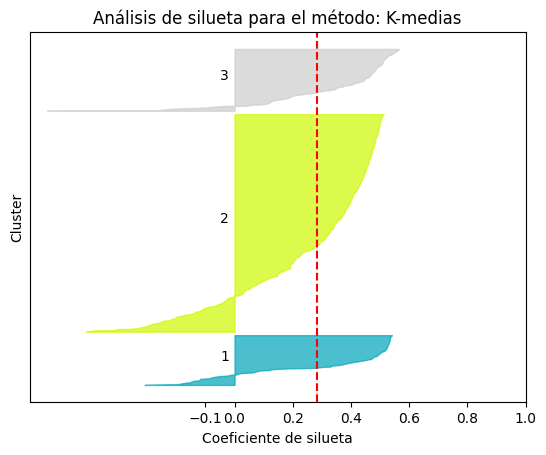

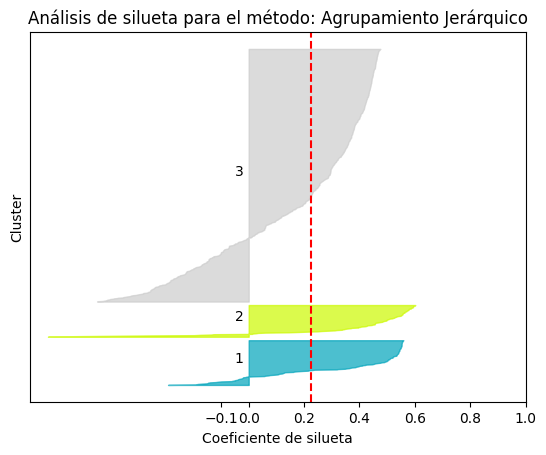

In [5]:
# El coeficiente de silueta mide la calidad de un clustering basándose en qué tan similar es un objeto a su propio cluster comparado con otros clusters.
# df ya tiene los labes de 'cluster_kmeans', 'cluster_hc'
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular y graficar los coeficientes de silueta para un método de clustering específico
def plot_silhouette(df, labels, title):
  X = df[numerical_features].values
  display(X)
  cluster_labels = df[labels]
  silhouette_avg = silhouette_score(X, cluster_labels)
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  fig, ax = plt.subplots()
  y_lower = 10
  for i in np.unique(cluster_labels):
    # Agregar los coeficientes de silueta del cluster i y ordenarlos
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar los gráficos con los números de cluster en el medio
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax.set_title("Análisis de silueta para el método: " + title)
  ax.set_xlabel("Coeficiente de silueta")
  ax.set_ylabel("Cluster")

  # La línea vertical para el coeficiente de silueta medio
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # plt.show()

  return silhouette_avg

df_analizar = pd.concat([df[numerical_features], df[['cluster_kmeans', 'cluster_hc']]], axis=1)
display(df_analizar.head())
# Ejecutar la función para K-medias
avg_silhouette_kmeans = plot_silhouette(df_analizar, 'cluster_kmeans', 'K-medias')

# Ejecutar la función para el agrupamiento jerárquico
avg_silhouette_hc = plot_silhouette(df_analizar, 'cluster_hc', 'Agrupamiento Jerárquico')

print(f"Promedio de silueta para K-medias: {avg_silhouette_kmeans}")
print(f"Promedio de silueta para Agrupamiento Jerárquico: {avg_silhouette_hc}")


In [6]:
# from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

with pd.ExcelWriter(os.path.join(directorio_salida, 'anova_tables.xlsx'), engine='xlsxwriter') as writer:
  startrow = 0
  for feature in numerical_features:
    model = ols(f'Q("{feature}") ~ C(cluster_kmeans)', data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print('Feature:', feature)
    print(aov_table)
    print('')
    # Añadir un título antes de cada tabla para claridad
    worksheet = writer.sheets['ANOVA Results'] if 'ANOVA Results' in writer.sheets else writer.book.add_worksheet('ANOVA Results')
    worksheet.write_string(startrow, 0, f'Feature: {feature}')  # Escribe el título de la característica
    startrow += 1  # Incrementa la fila de inicio para dejar espacio para el título
    
    # Escribir la tabla ANOVA en Excel
    aov_table.to_excel(writer, sheet_name='ANOVA Results', startrow=startrow, index=True)
    
    # Actualizar startrow para la siguiente tabla, incluyendo un renglón adicional para separación
    startrow += len(aov_table) + 3  # +3 para la separación y los índices de la tabla

print('Tablas ANOVA exportadas a anova_tables.xlsx')

Feature: alumnos
                         sum_sq      df           F        PR(>F)
C(cluster_kmeans)  31170.863047     2.0  190.802067  2.701599e-71
Residual           84787.749825  1038.0         NaN           NaN

Feature: 1p_total_actividades_asignadas
                        sum_sq      df          F         PR(>F)
C(cluster_kmeans)  5852.991173     2.0  304.83843  7.076792e-105
Residual           9964.958875  1038.0        NaN            NaN

Feature: 1p_total_actividades_evaluativas
                        sum_sq      df           F         PR(>F)
C(cluster_kmeans)  5372.587269     2.0  340.511834  1.973072e-114
Residual           8188.769119  1038.0         NaN            NaN

Feature: 1p_porcentaje_evidencias_calificadas
                      sum_sq      df           F         PR(>F)
C(cluster_kmeans)  43.757985     2.0  590.654877  5.239924e-172
Residual           38.449516  1038.0         NaN            NaN

Feature: 1p_total_actividades_calificadas
                         s

In [7]:
# comparacion de medias
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for feature in numerical_features:
  tukey = pairwise_tukeyhsd(endog=df[feature], groups=df['cluster_kmeans'], alpha=0.05)
  print('Feature:', feature)
  print(tukey.summary())
  print('')

# from scipy.stats import kruskal

# for feature in numerical_features:
#   df_cluster1 = df[df['cluster_kmeans'] == 1][feature]
#   df_cluster2 = df[df['cluster_kmeans'] == 2][feature]
#   df_cluster3 = df[df['cluster_kmeans'] == 3][feature]

#   # Realizar Kruskal-Wallis
#   statistic, pvalue = kruskal(df_cluster1, df_cluster2, df_cluster3)
#   print('Feature:', feature)
#   print('Estadístico H:', statistic)
#   print('Valor p:', pvalue)
#   print('')


Feature: alumnos
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -9.5484    0.0 -11.4201 -7.6768   True
     1      3   3.2963 0.0019   1.0283  5.5643   True
     2      3  12.8448    0.0   11.127 14.5625   True
-----------------------------------------------------

Feature: 1p_total_actividades_asignadas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3.7825   0.0 3.1409 4.4241   True
     1      3   8.0989   0.0 7.3214 8.8764   True
     2      3   4.3164   0.0 3.7275 4.9053   True
-------------------------------------------------

Feature: 1p_total_actividades_evaluativas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   3

In [9]:
# Obtener dataframes con los datos de cada cluster

df_por_cluster = df_analizar.groupby("cluster_kmeans")
df_por_cluster


Graficos de caja e histogramas para visualizar la distribución de los datos.

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud: 0.9521531100478469
Precisión: 0.9521629719969954


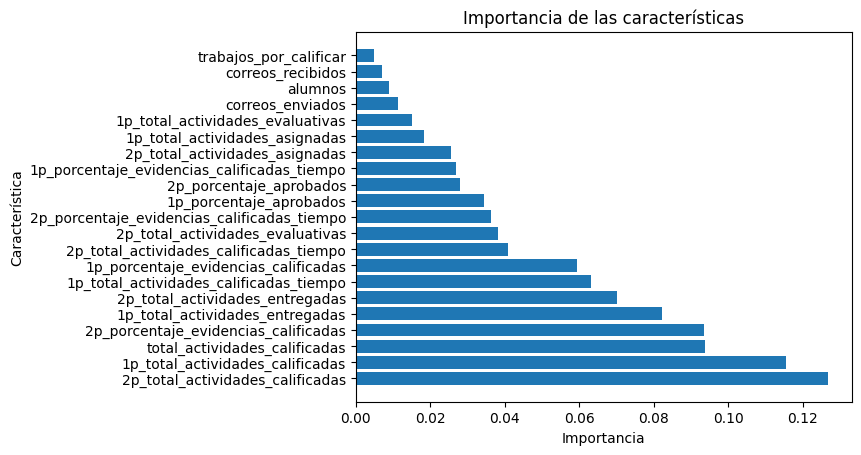

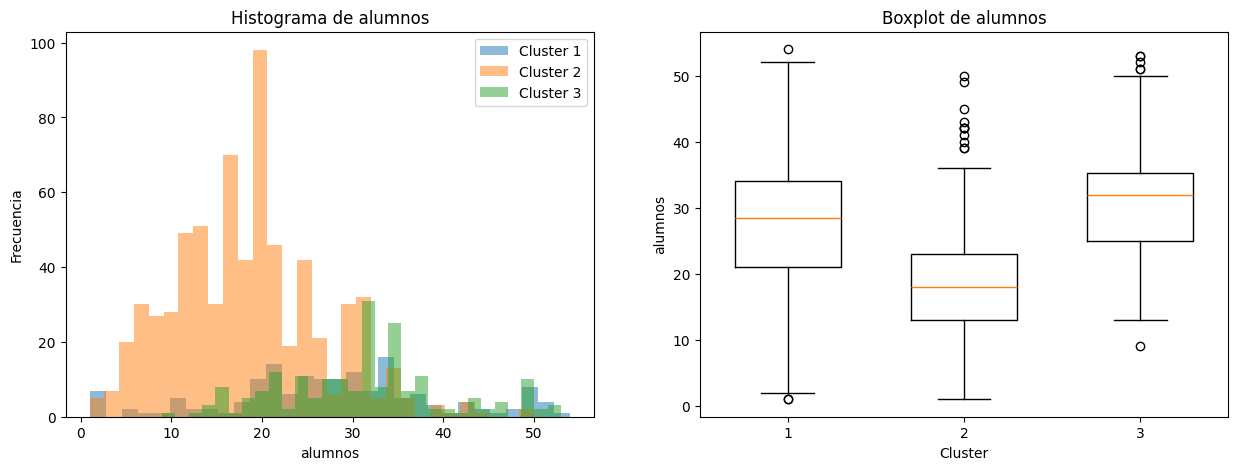

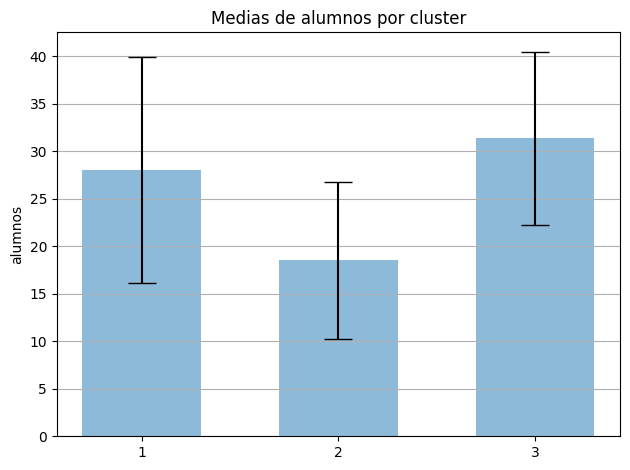

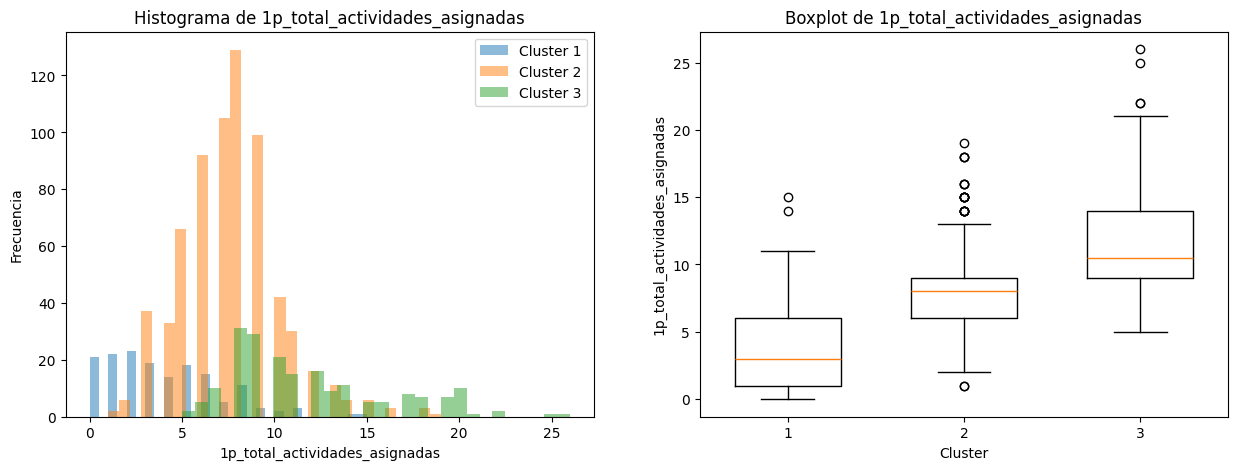

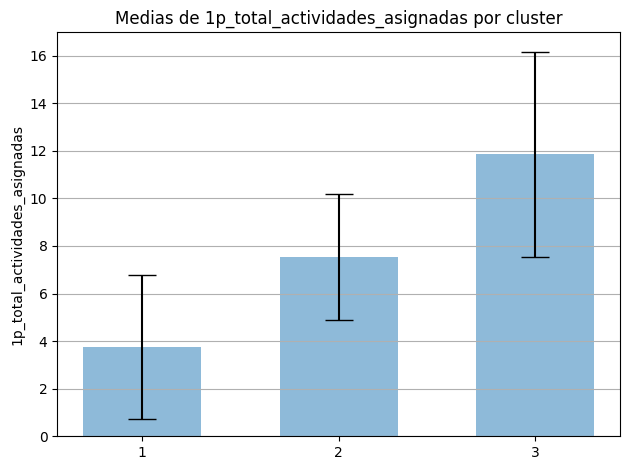

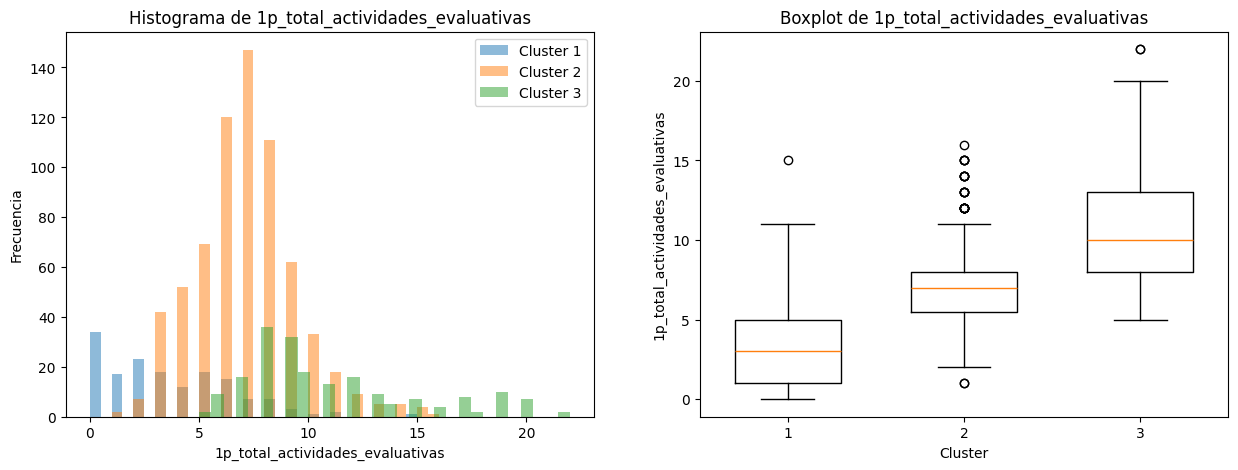

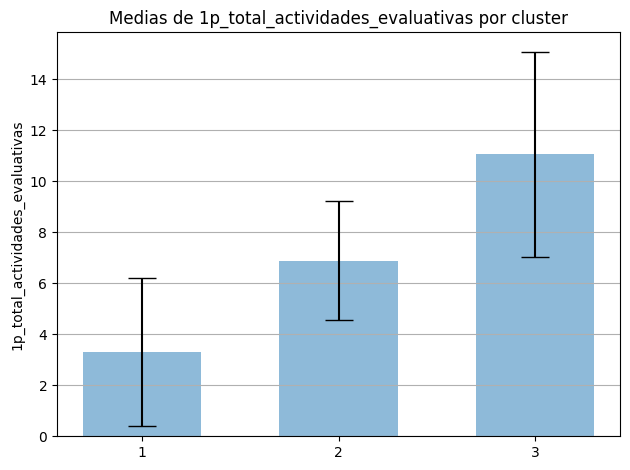

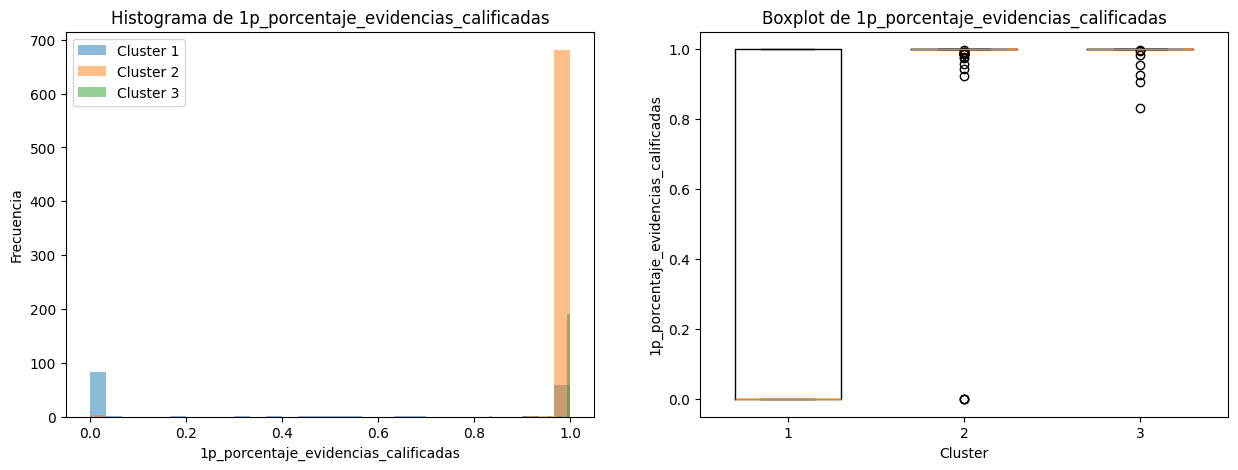

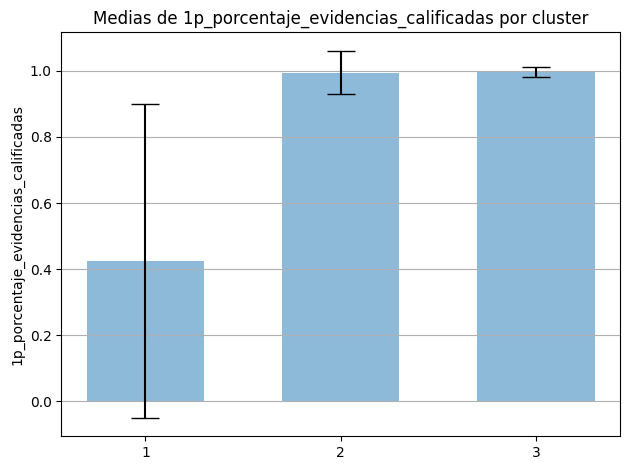

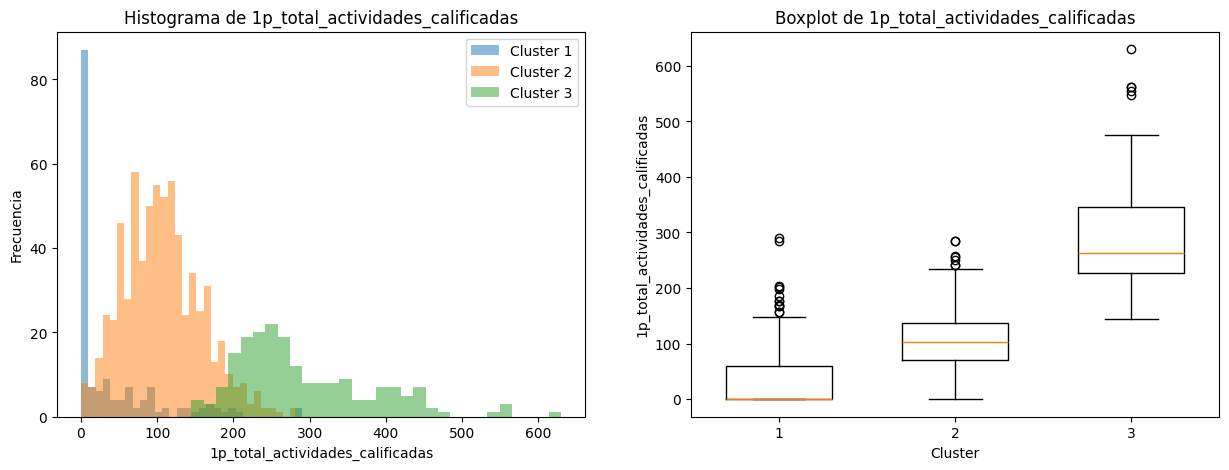

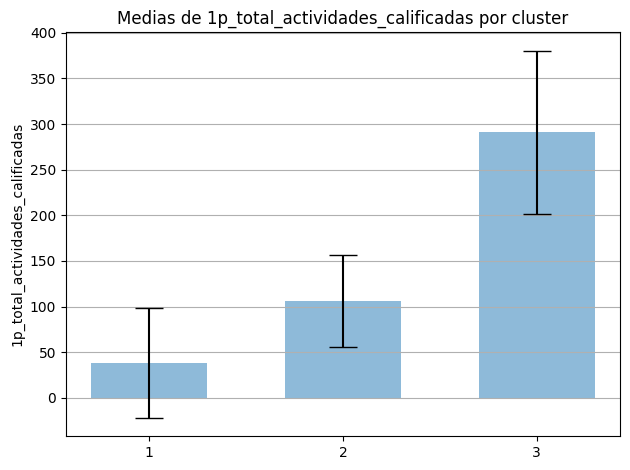

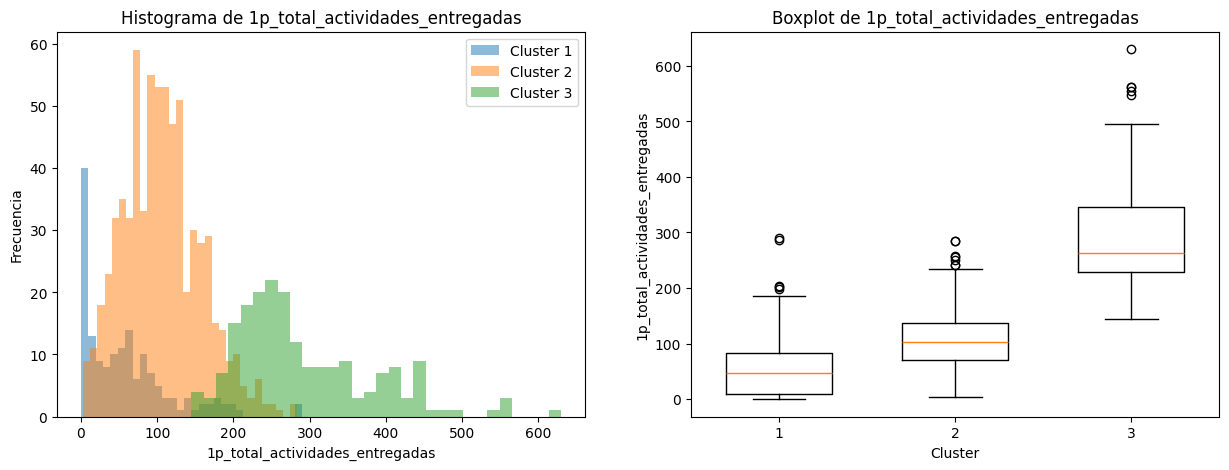

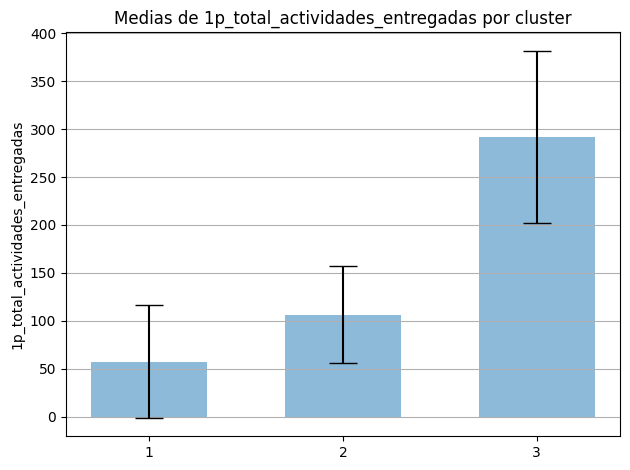

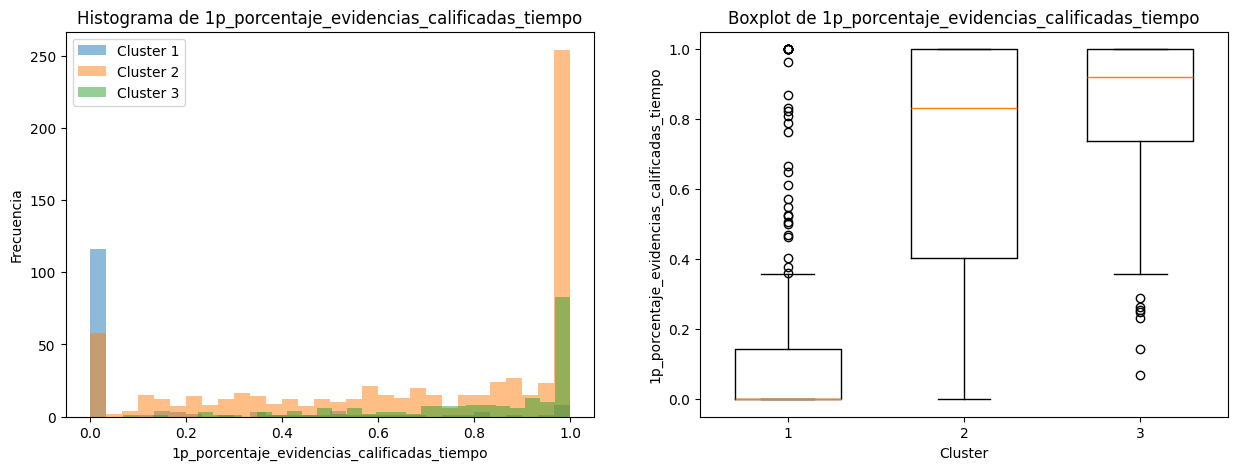

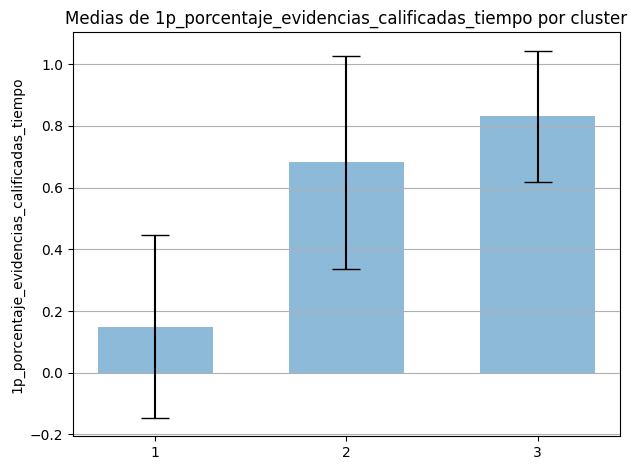

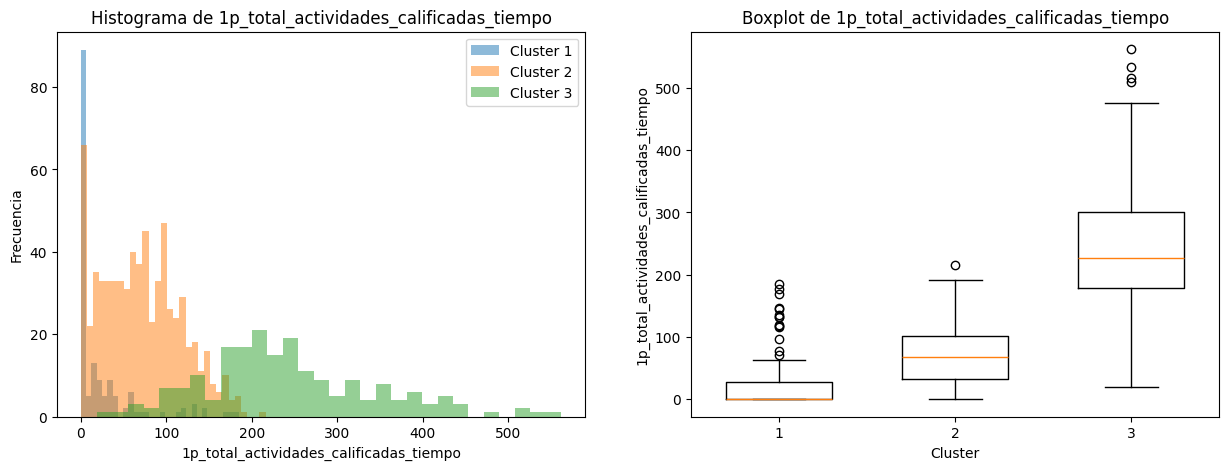

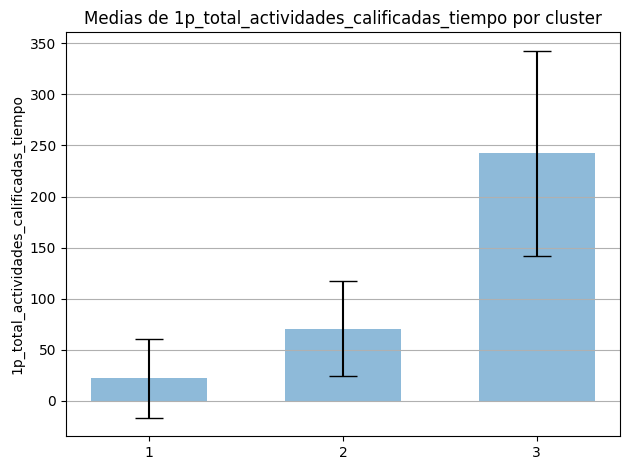

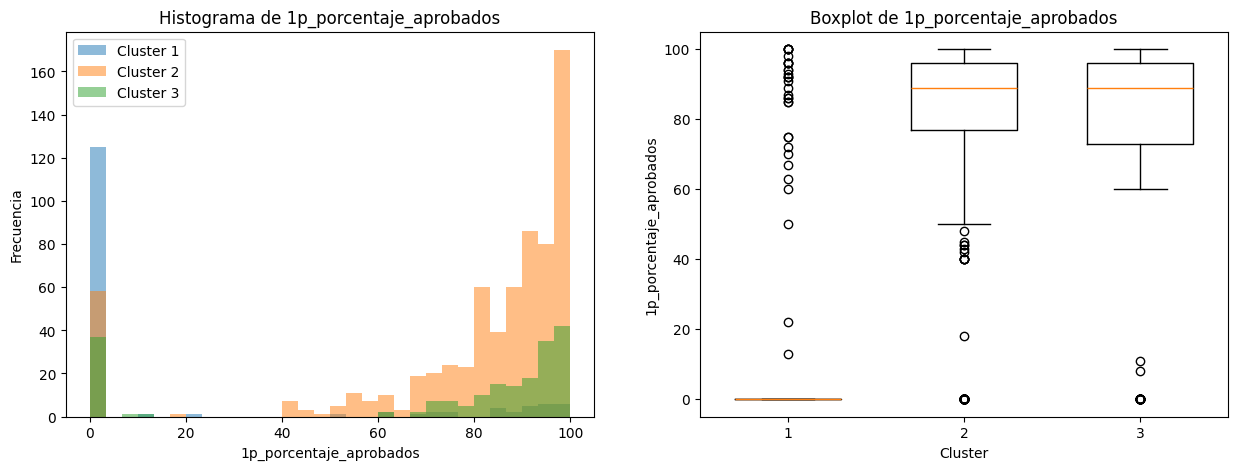

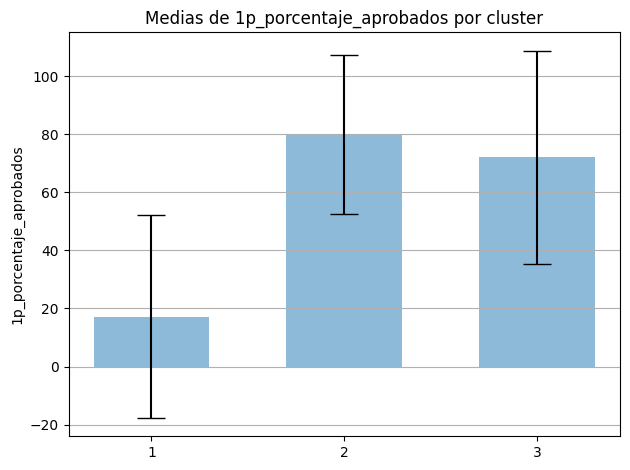

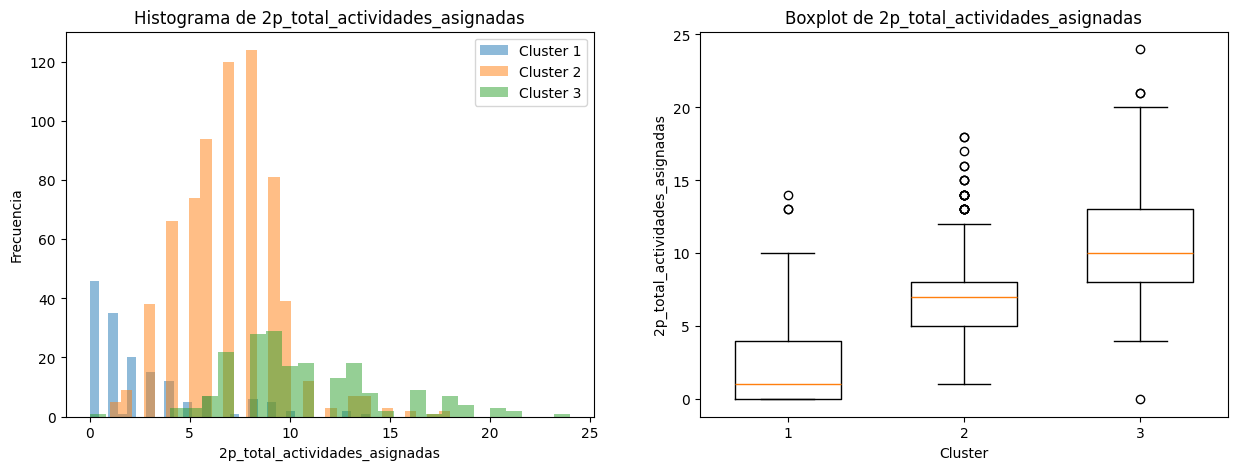

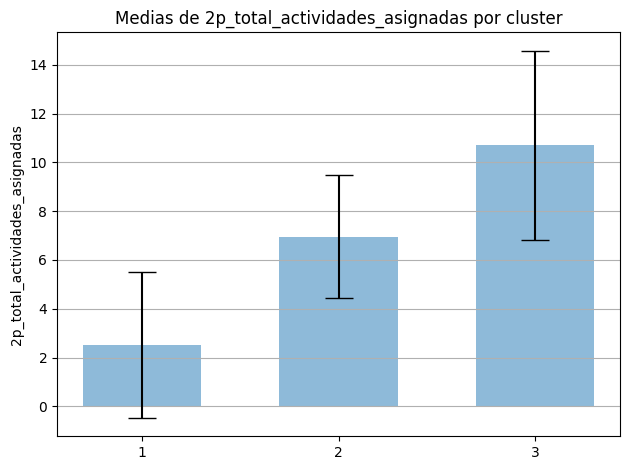

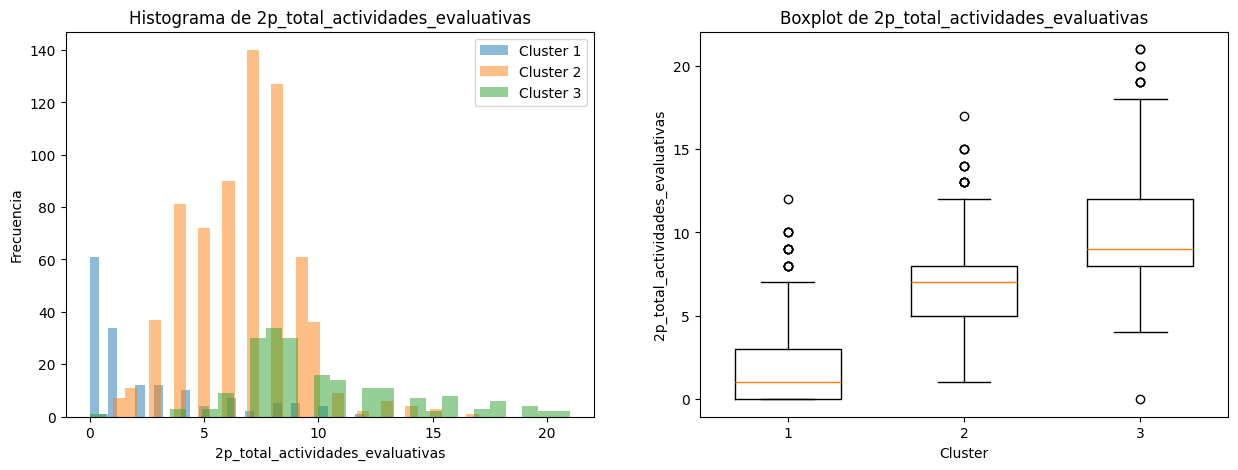

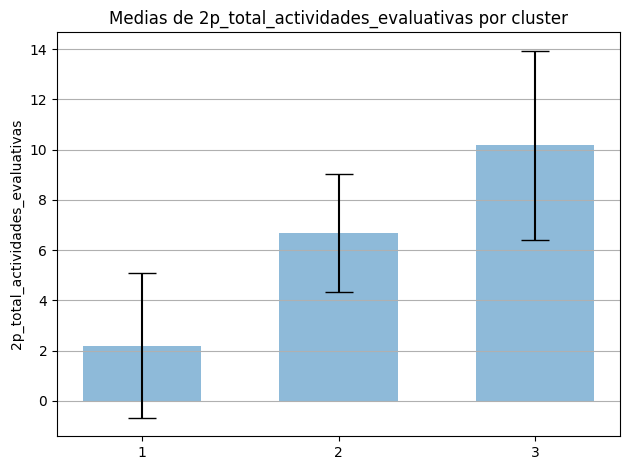

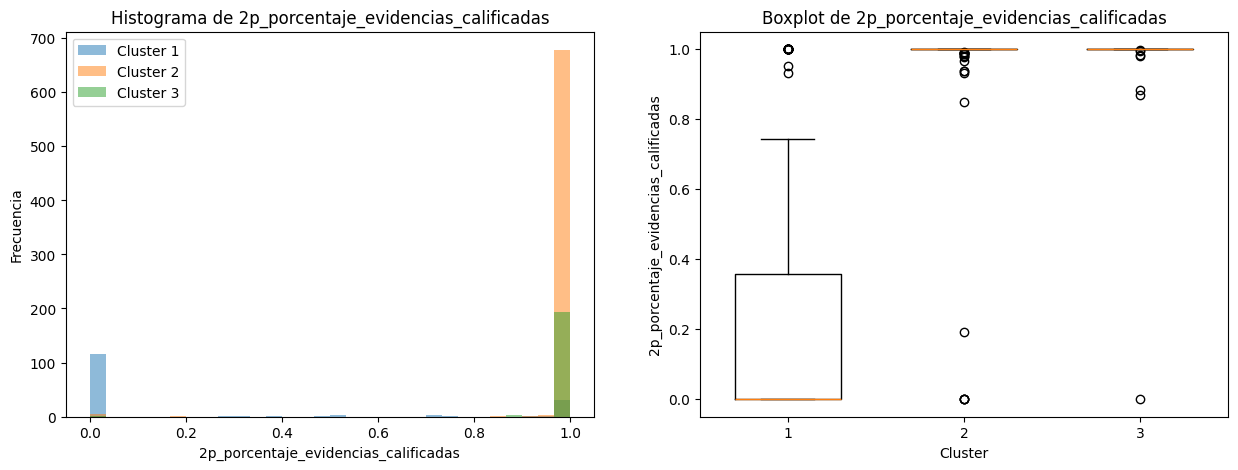

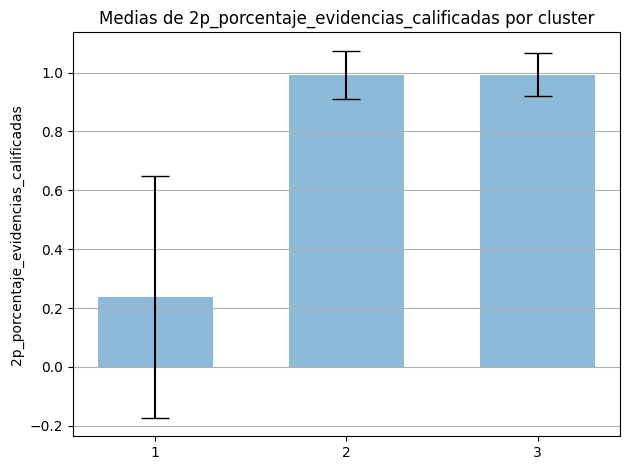

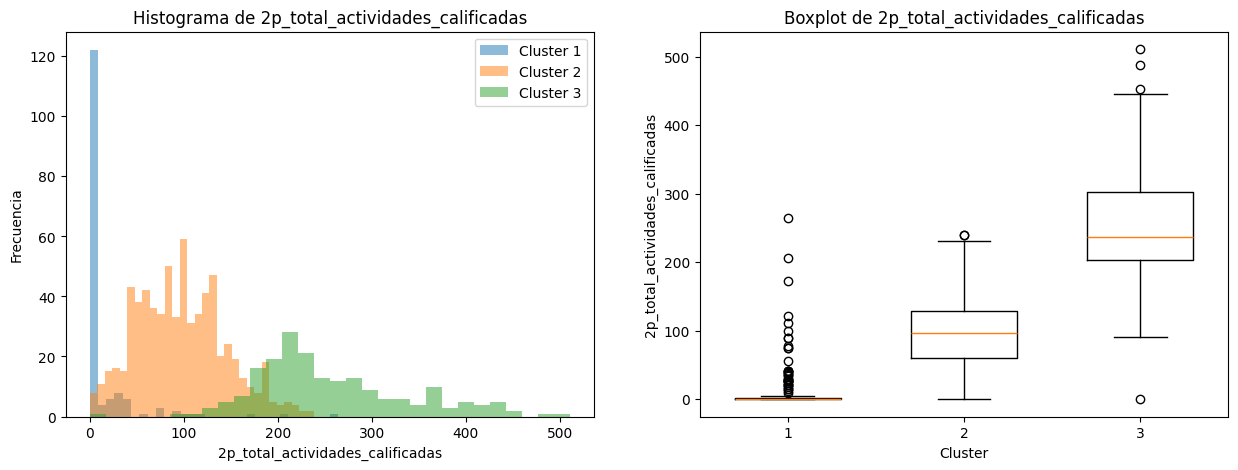

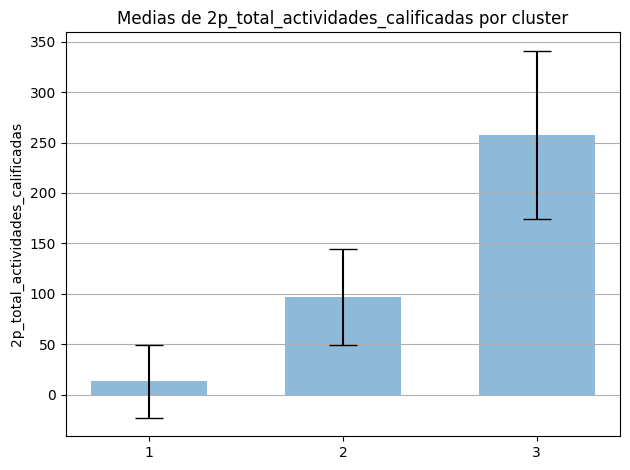

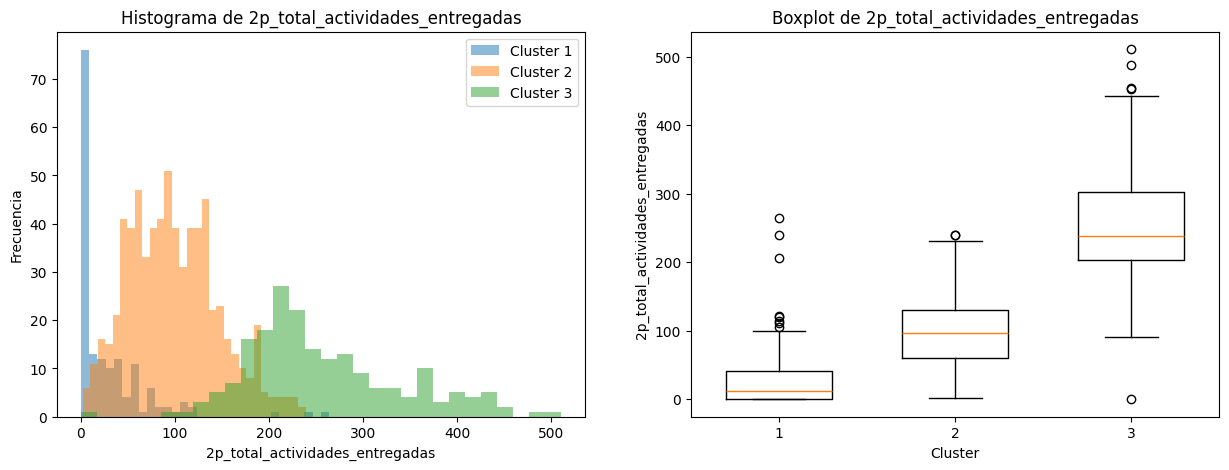

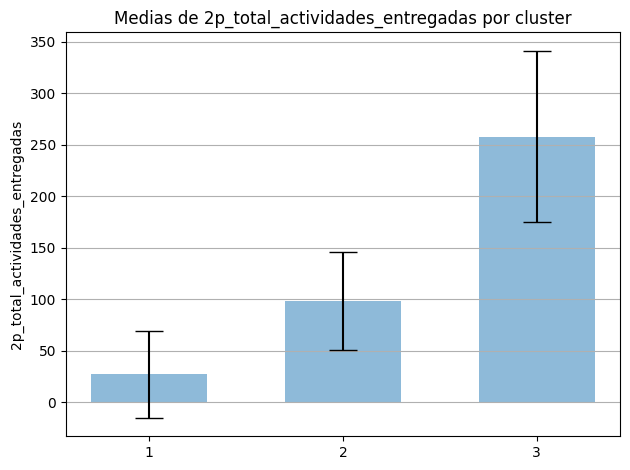

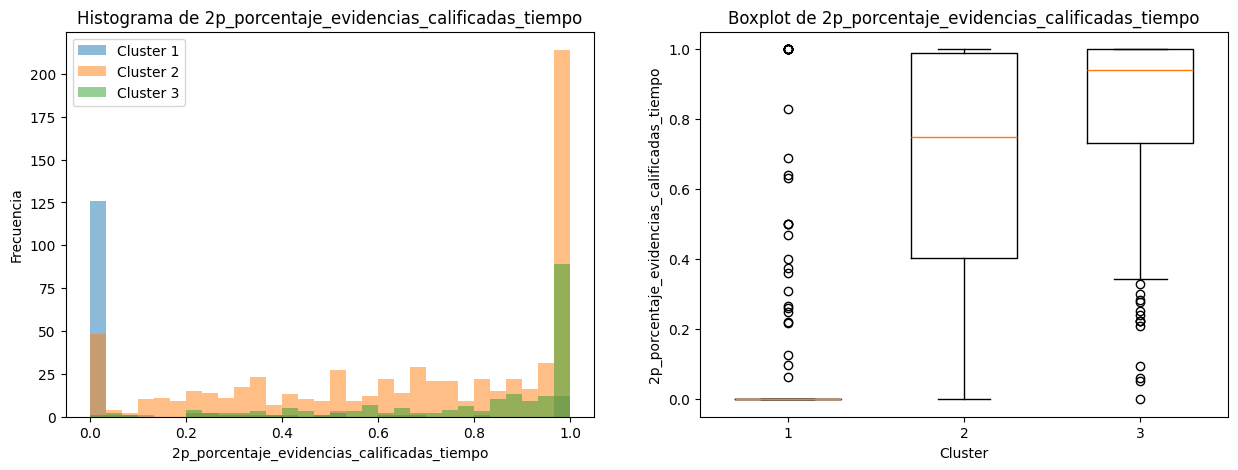

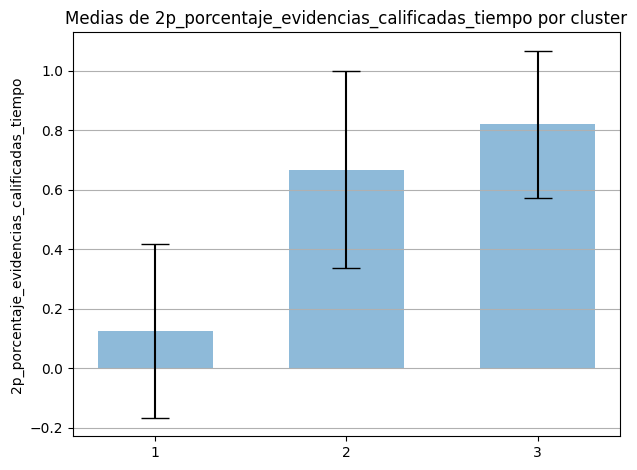

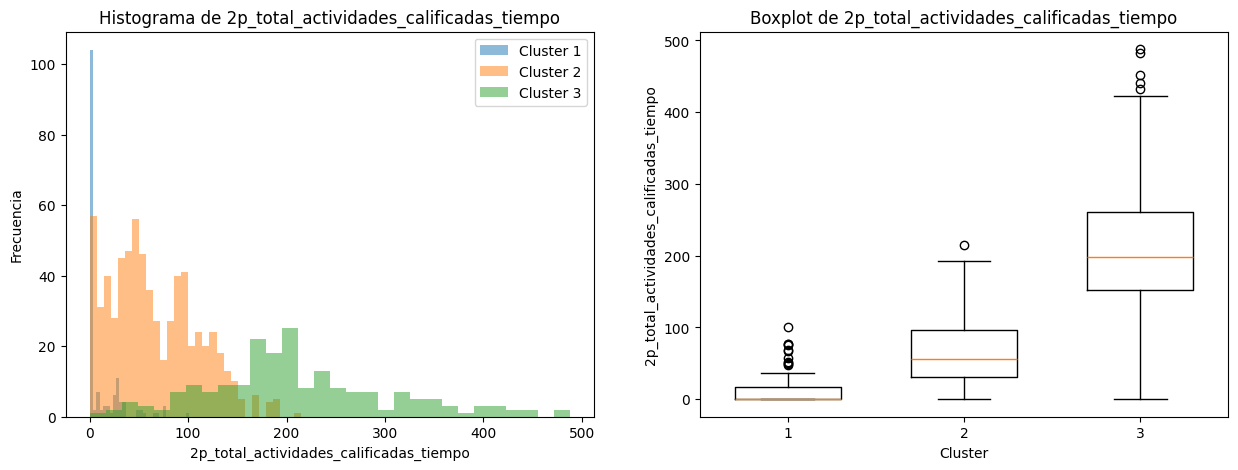

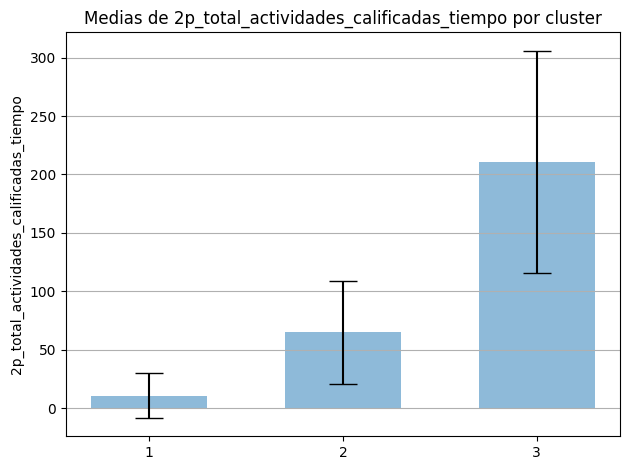

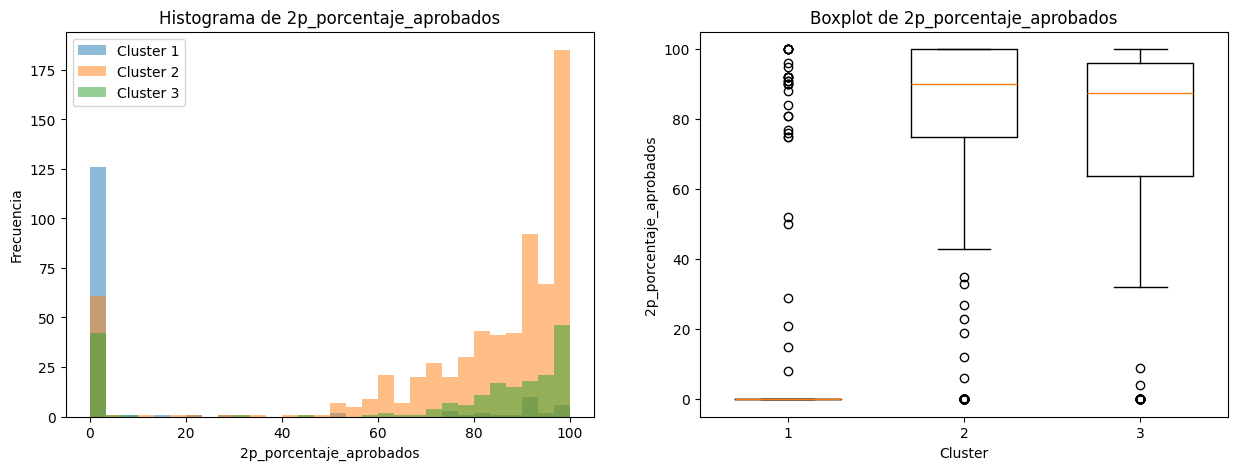

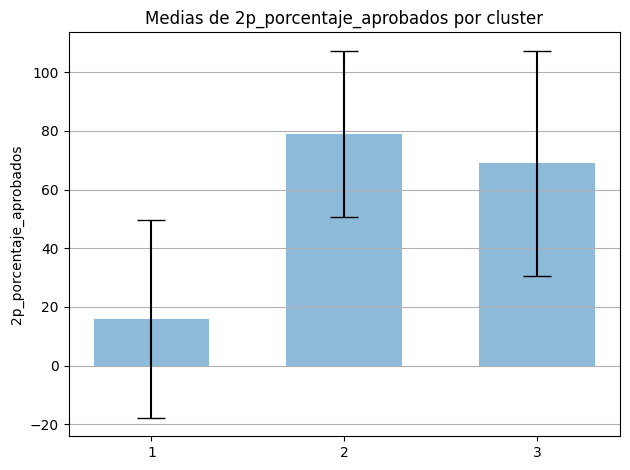

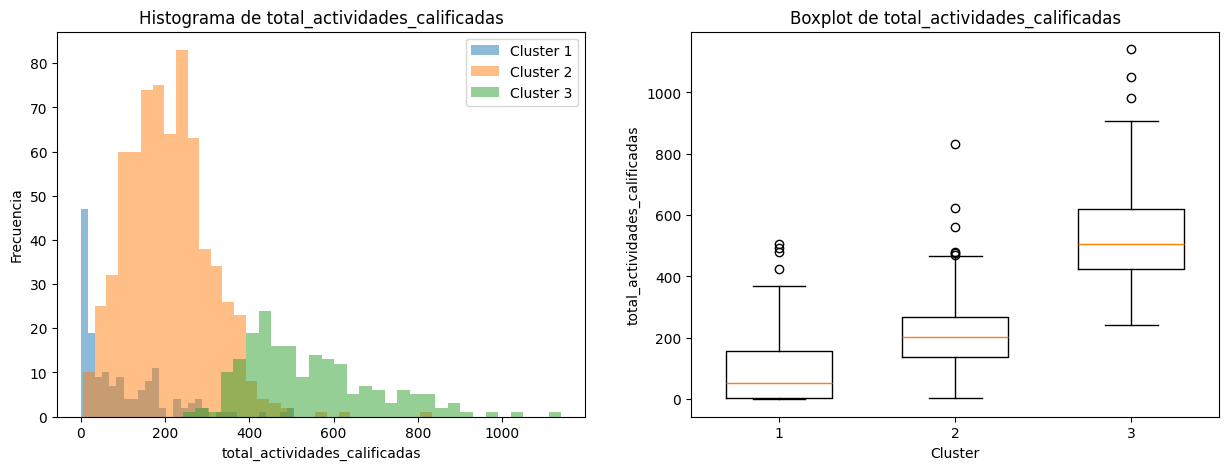

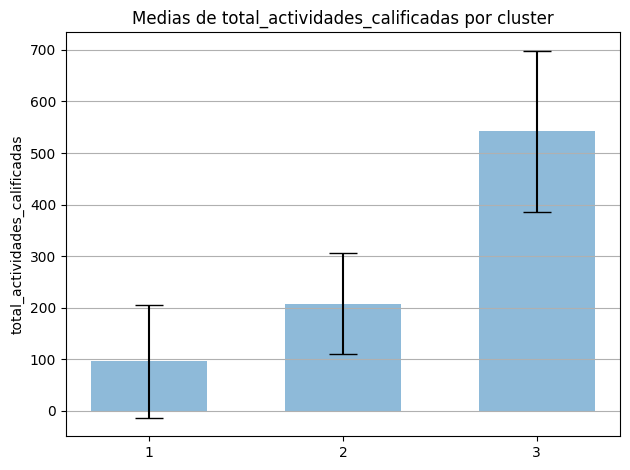

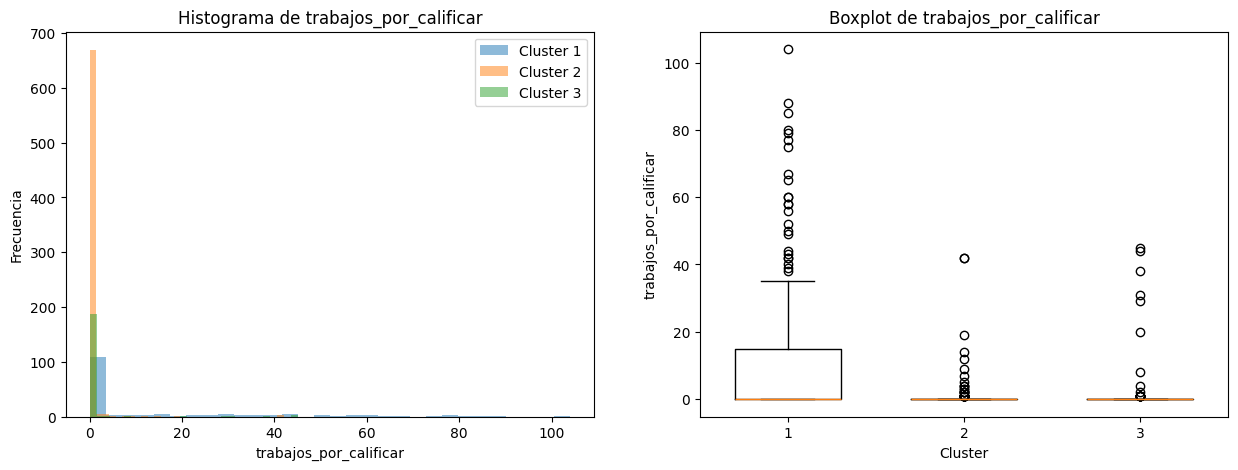

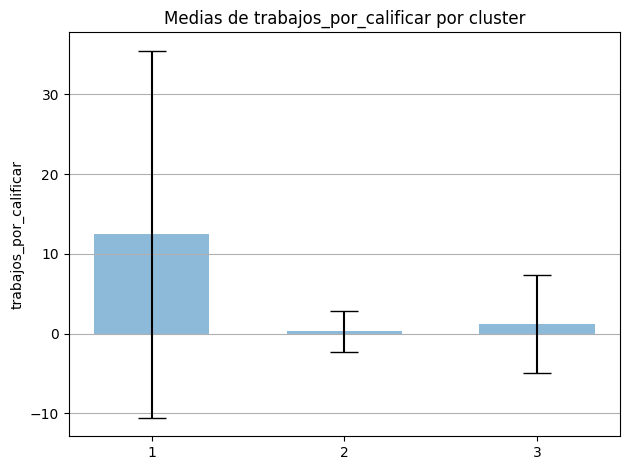

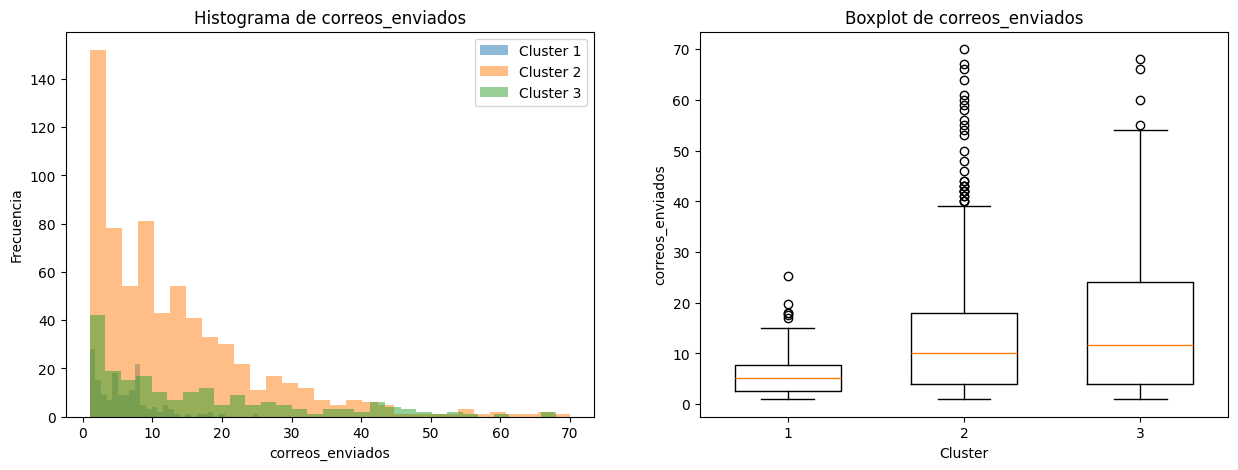

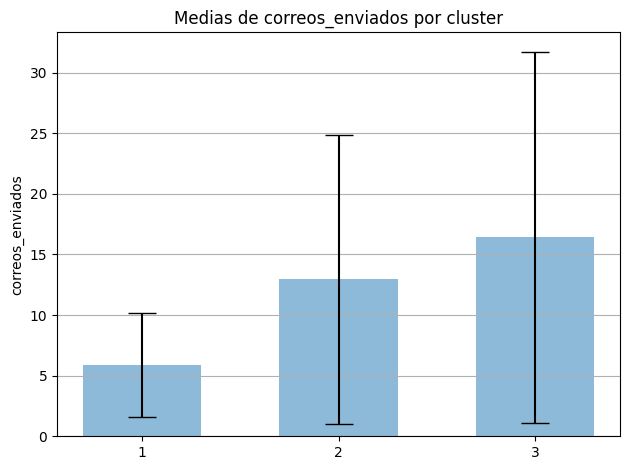

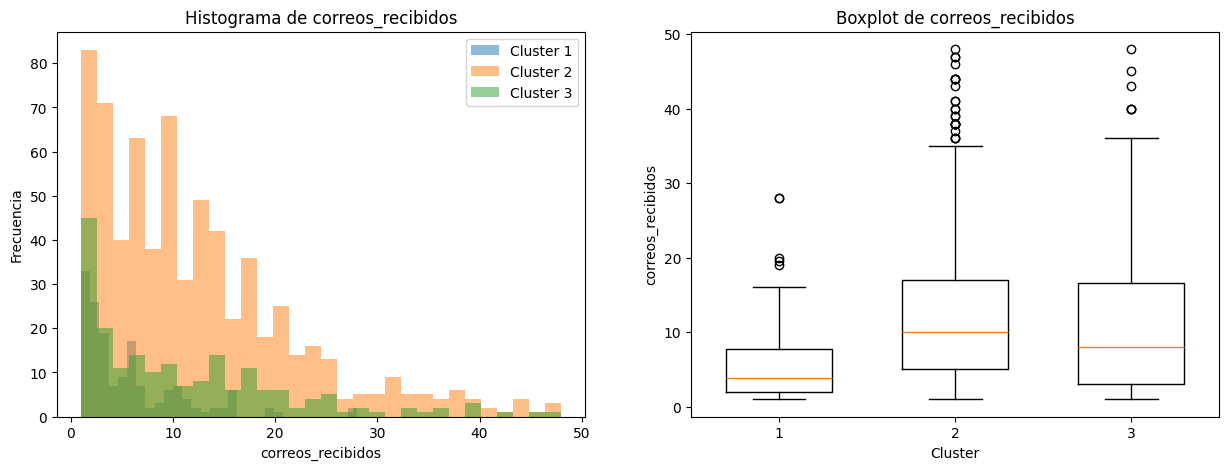

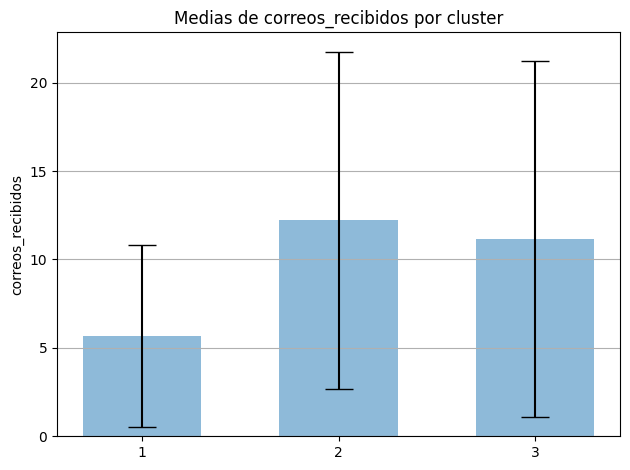

In [16]:
# import plotly.express as px
# usando matplotlib
import matplotlib.pyplot as plt


# variables mas importantes
from sklearn.ensemble import RandomForestClassifier
# grid search para encontrar los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X = df_analizar[numerical_features]
y = df_analizar['cluster_kmeans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de bosque aleatorio
rf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de búsqueda
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [5, 10, 15, 20],
  'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda en la cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros

best_params = grid_search.best_params_
print('Mejores hiperparámetros:', best_params)

# Crear un modelo con los mejores hiperparámetros
rf_best = RandomForestClassifier(random_state=42, **best_params)

# Entrenar el modelo
rf_best.fit(X_train, y_train)

# ver la exactitud y precisión

from sklearn.metrics import accuracy_score, precision_score

# Predecir los datos de prueba
y_pred = rf_best.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud:', accuracy)

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='weighted')
print('Precisión:', precision)


# Obtener la importancia de las características
feature_importances = pd.DataFrame({'feature': numerical_features, 'importance': rf_best.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Graficar las características más importantes
fig, ax = plt.subplots()
ax.barh(feature_importances['feature'], feature_importances['importance'])
ax.set_xlabel('Importancia')
ax.set_ylabel('Característica')
ax.set_title('Importancia de las características')
plt.show()


# Graficos de caja e histogramas para visualizar la distribución de los datos.
for col in numerical_features:
  # fig = px.box(df_analizar, x='cluster_kmeans', y=col, title=col)
  # # add the mean of each cluster for the column
  # fig.add_scatter(x=df_por_cluster[col].mean().index, y=df_por_cluster[col].mean().values, mode='markers', marker=dict(size=10, color='black'), name='media')
  # fig.show()

  # fig = px.histogram(df_analizar, x=col, color='cluster_kmeans', title=col)
  # fig.show()

  # # histograma de densidad
  # fig = px.histogram(df_analizar, x=col, color='cluster_kmeans', title=col, marginal='rug', histnorm='probability density')
  # fig.show()

  # son 3 clusters
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  for cluster in np.unique(df['cluster_kmeans']):
    df_cluster = df_analizar[df_analizar['cluster_kmeans'] == cluster]
    ax[0].hist(df_cluster[col], bins=30, alpha=0.5, label=f'Cluster {cluster}')
    ax[0].set_title(f'Histograma de {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frecuencia')
    ax[0].legend()

    ax[1].boxplot(df_cluster[col], positions=[cluster], widths=0.6)
    ax[1].set_title(f'Boxplot de {col}')
    ax[1].set_xlabel('Cluster')
    ax[1].set_ylabel(col)

  plt.show()

  # plot para comparar medias con matplotlib

  fig, ax = plt.subplots()
  ax.bar(df_por_cluster[col].mean().index, df_por_cluster[col].mean().values, yerr=df_por_cluster[col].std().values, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.6)
  ax.set_ylabel(col)
  ax.set_xticks(df_por_cluster[col].mean().index)
  ax.set_xticklabels(df_por_cluster[col].mean().index)
  ax.set_title(f'Medias de {col} por cluster')
  ax.yaxis.grid(True)
  plt.tight_layout()
  plt.show()




